In [1]:
#Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
#Get the stock quote 
# df = web.DataReader('RELIANCE.NS', data_source='yahoo', start='2012-01-01', end='2021-06-29') 
df = pd.read_csv("Dataset/RELIANCE.csv")
# droping null values
df = df.dropna()
#Show the data 
df

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
2850,2011-06-01,RELIANCE,EQ,951.85,952.00,958.65,943.65,947.50,946.80,947.83,1838452,1.742538e+14,58630.0,901415.0,0.4903
2851,2011-06-02,RELIANCE,EQ,946.80,936.55,954.70,936.55,952.50,951.05,947.09,2152963,2.039039e+14,63061.0,1066759.0,0.4955
2852,2011-06-03,RELIANCE,EQ,951.05,960.50,967.00,931.50,936.00,934.60,951.69,4368279,4.157238e+14,128784.0,1035791.0,0.2371
2853,2011-06-06,RELIANCE,EQ,934.60,934.65,940.80,928.15,938.60,937.75,935.29,1405741,1.314771e+14,43384.0,476631.0,0.3391
2854,2011-06-07,RELIANCE,EQ,937.75,933.55,960.00,933.55,959.60,958.25,950.55,4025919,3.826839e+14,88703.0,2424958.0,0.6023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5070,2020-05-22,RELIANCE,EQ,1441.25,1451.80,1458.00,1426.50,1433.00,1431.55,1442.31,17458503,2.518059e+15,388907.0,4083814.0,0.2339
5071,2020-05-26,RELIANCE,EQ,1431.55,1448.15,1449.70,1416.30,1426.00,1424.05,1428.70,15330793,2.190317e+15,341795.0,7437964.0,0.4852
5072,2020-05-27,RELIANCE,EQ,1424.05,1431.00,1454.00,1412.00,1449.85,1445.55,1430.20,16460764,2.354223e+15,348477.0,6524302.0,0.3964
5073,2020-05-28,RELIANCE,EQ,1445.55,1455.00,1479.75,1449.00,1471.05,1472.25,1467.50,18519252,2.717698e+15,405603.0,8377100.0,0.4523


In [3]:
df.shape

(2225, 15)

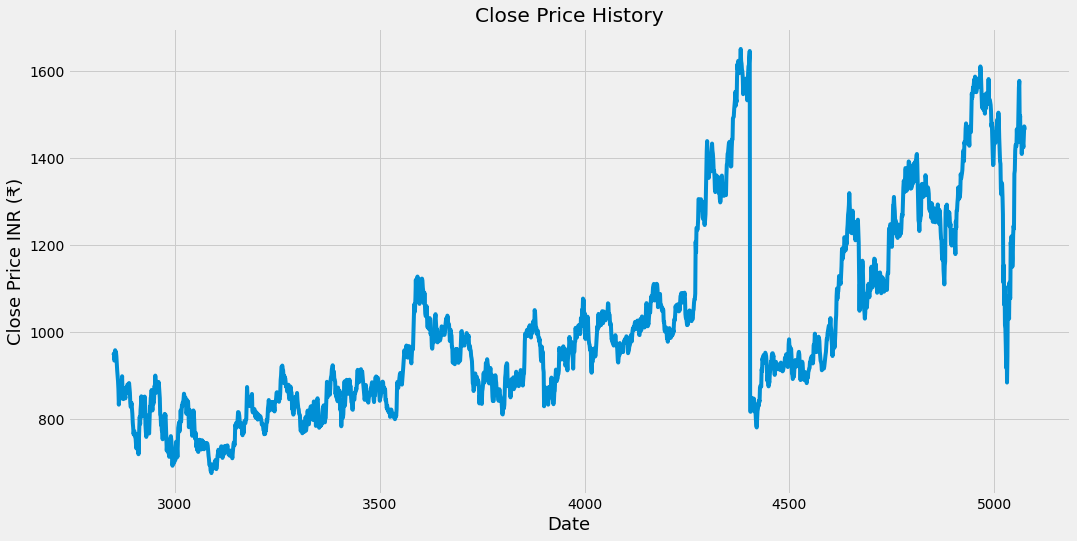

In [4]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price INR (₹)',fontsize=18)
plt.show()

In [5]:
#Create a new dataframe with only the 'Close' column
data = df.filter(['Close'])
#Converting the dataframe to a numpy array
dataset = data.values
#Get /Compute the number of rows to train the model on
training_data_len = math.ceil( len(dataset) *.8)

In [6]:
#Scale the all of the data to be values between 0 and 1 
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)

In [7]:
#Create the scaled training data set 
train_data = scaled_data[0:training_data_len  , : ]
#Split the data into x_train and y_train data sets
x_train=[]
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

In [8]:
#Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [9]:
#Reshape the data into the shape accepted by the LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [10]:
#Build the LSTM network model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [11]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [12]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=5)

Epoch 1/5
1720/1720 [==============================] - 37s 14ms/step - loss: 0.0080
Epoch 2/5
1720/1720 [==============================] - 23s 14ms/step - loss: 0.0043
Epoch 3/5
1720/1720 [==============================] - 23s 14ms/step - loss: 7.5844e-04
Epoch 4/5
1720/1720 [==============================] - 24s 14ms/step - loss: 9.9902e-04
Epoch 5/5
1720/1720 [==============================] - 25s 14ms/step - loss: 5.8613e-04


In [13]:
#Save the model
model.save("Reliance_Prediction_model", save_format='h5')

In [14]:
#Test data set
test_data = scaled_data[training_data_len - 60: , : ]
#Create the x_test and y_test data sets
x_test = []
y_test =  dataset[training_data_len : , : ] #Get all of the rows from index 1603 to the rest and all of the columns (in this case it's only column 'Close'), so 2003 - 1603 = 400 rows of data
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [15]:
#Convert x_test to a numpy array 
x_test = np.array(x_test)

In [16]:
#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [17]:
#Getting the models predicted price values
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)#Undo scaling

In [18]:
#Calculate/Get the value of RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

73.3517971776058

<ipython-input-19-94192174a3e6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


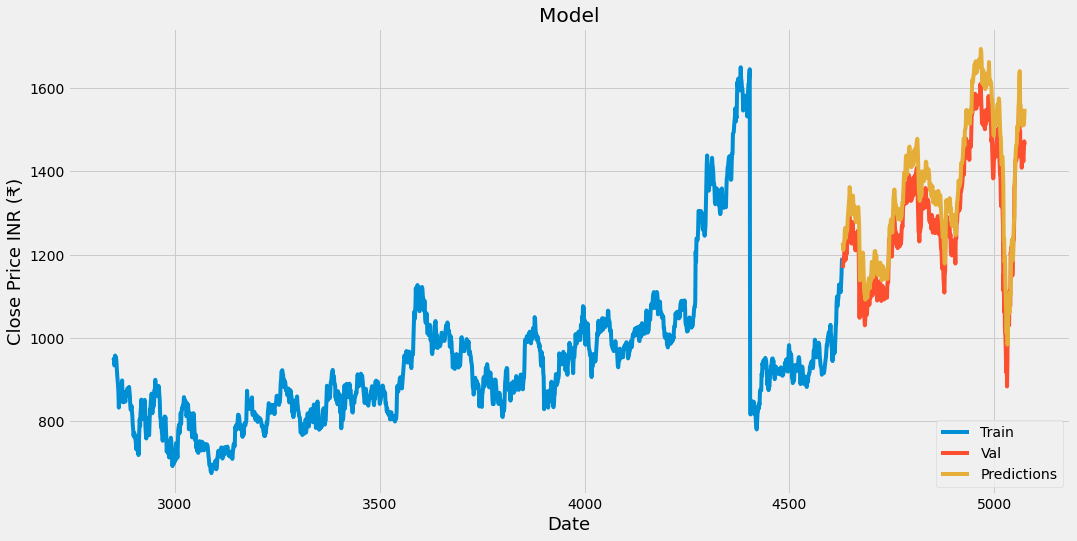

In [19]:
#Plot/Create the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price INR (₹)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.savefig('Reliance_Predicted_Graph.png')
plt.show()

In [20]:
#Show the valid and predicted prices
valid

,Close,Predictions
4630,1168.35,1228.726440
4631,1176.95,1211.538574
4632,1192.60,1213.578369
4633,1184.20,1230.028076
4634,1217.70,1230.876221
...,...,...
5070,1431.55,1533.128906
5071,1424.05,1523.244385
5072,1445.55,1511.556763
5073,1472.25,1525.937378
